In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler

In [283]:
a = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UK_foods.csv", index_col = 'Unnamed: 0')

In [284]:
a.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [285]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Cheese to Confectionery 
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   England    17 non-null     int64
 1   Wales      17 non-null     int64
 2   Scotland   17 non-null     int64
 3   N.Ireland  17 non-null     int64
dtypes: int64(4)
memory usage: 680.0+ bytes


In [286]:
a.describe()

,England,Wales,Scotland,N.Ireland
count,17.000000,17.000000,17.000000,17.000000
mean,469.647059,503.941176,460.235294,429.941176
std,452.701466,463.859282,469.595907,479.896014
min,54.000000,64.000000,53.000000,41.000000
25%,156.000000,175.000000,147.000000,135.000000
50%,253.000000,265.000000,242.000000,209.000000
75%,685.000000,803.000000,566.000000,586.000000
max,1472.000000,1582.000000,1572.000000,1506.000000


In [287]:
a

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [288]:
a.corr()

,England,Wales,Scotland,N.Ireland
England,1.000000,0.990654,0.984917,0.947619
Wales,0.990654,1.000000,0.964122,0.937061
Scotland,0.984917,0.964122,1.000000,0.940742
N.Ireland,0.947619,0.937061,0.940742,1.000000


<Axes: >

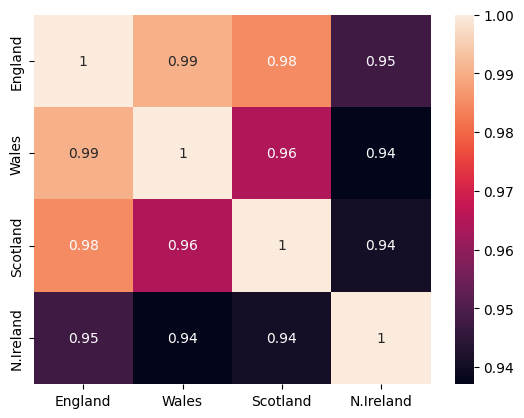

In [289]:
import seaborn as sns
sns.heatmap(a.corr(), annot = True)

In [290]:
a.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [291]:
encoder = Sequential()
encoder.add(Dense(units = 8, activation = 'relu', input_shape = [17]))
encoder.add(Dense(units = 4, activation = 'relu', input_shape = [8]))
encoder.add(Dense(units = 2, activation = 'relu', input_shape = [4]))

In [292]:
decoder = Sequential()
decoder.add(Dense(units = 4, activation = 'relu', input_shape = [2]))
decoder.add(Dense(units = 8, activation = 'relu', input_shape = [4]))
decoder.add(Dense(units = 17, activation = 'relu', input_shape = [8]))

In [293]:
Autoencoder = Sequential([encoder, decoder])

In [294]:
Autoencoder.compile(optimizer = SGD(learning_rate = 1.5), loss = 'mse')

In [295]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(a.transpose().values)

In [296]:
scaled

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [297]:
scaled.shape

(4, 17)

In [298]:
Autoencoder.fit(scaled, scaled, epochs = 15)

Epoch 1/15
1/1 [==============================] - 1s 1s/step - loss: 0.4259
Epoch 2/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3685
Epoch 3/15
1/1 [==============================] - 0s 22ms/step - loss: 0.2843
Epoch 4/15
1/1 [==============================] - 0s 16ms/step - loss: 0.2421
Epoch 5/15
1/1 [==============================] - 0s 13ms/step - loss: 0.2229
Epoch 6/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2162
Epoch 7/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2138
Epoch 8/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2128
Epoch 9/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2123
Epoch 10/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2118
Epoch 11/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2114
Epoch 12/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2109
Epoch 13/15
1/1 [==============================] - 0s 11ms/step

In [299]:
predictions = encoder.predict(scaled)

1/1 [==============================] - 0s 73ms/step


In [300]:
predictions

array([[0.0272586 , 0.21058789],
       [0.        , 0.45105335],
       [0.20425068, 0.14100614],
       [0.0133878 , 0.21604098]], dtype=float32)

In [301]:
predictions.shape

(4, 2)

In [302]:
results = pd.DataFrame(data=predictions,index=a.transpose().index,
                      columns=['C1','C2'])

In [303]:
results = results.reset_index()

<Axes: xlabel='C1', ylabel='C2'>

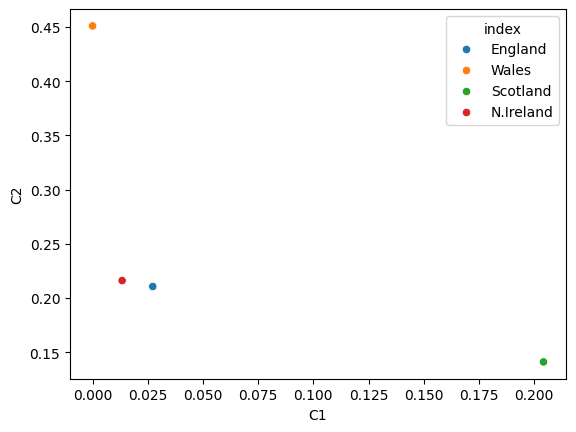

In [304]:
sns.scatterplot(x='C1',y='C2',data=results,hue='index')